In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from urllib.parse import urlencode

### Загрузим данные и проверим типы данных, пропуски, дубликаты, посмотрим на описательные статистики

In [ ]:
# Функция для скачивания файлов

def download(key):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    return download_url

INFO:pycodestyle:4:80: E501 line too long (80 > 79 characters)


In [ ]:
assessments = pd.read_csv(download('https://disk.yandex.ru/d/DirOCOZ5ClAg8A'))

In [ ]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [ ]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


В первом датафрейме имеем 206 строк (записей) и 6 колонок. В колонке date пропущено 11 значений (все относятся к типу теста Exam). Дублей не найдено. В датафрейме содержится информация о семи уникальных предметах и 4 уникальных семестрах, каждому предмету соответствует определенное количество тестов, при этом тесты не повторяются . У каждого теста есть свой вес в оценке и, чаще всего, дедлайн для сдачи. Каждый предмет включает в себя один экзамен в семестре (за исключением предмета ССС).

In [ ]:
courses = pd.read_csv(download('https://disk.yandex.ru/d/QnT8hrlyycKZXA'))

In [ ]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [ ]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


Во втором датафрейме имеем 22 строки (записи) и 3 колонки. Пропущенных значений нет. Дублей нет. Уникальное количество предметов и семестров в данном датафрейме совпадает с количеством в первом датафрейме (assessments).

In [ ]:
studentAssessment = pd.read_csv(download('https://disk.yandex.ru/d/1GcyxZiu5RSDvg'))

INFO:pycodestyle:1:80: E501 line too long (84 > 79 characters)


In [ ]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [ ]:
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


В третьем датафрейме имеем 173912 строки (записи) и 5 колонок. В колонке score 173 пропущенных значения. С типами данных все в порядке, дублей нет. Тесты сдавали 23369 студентов, их средний балл достаточно высок и близок к медианному значению. Датафрейм содержит информацию о сдаче 188 тестов из 206 (информация о которых имеется в датафрейме assessments). 

In [ ]:
studentRegistration = pd.read_csv(download('https://disk.yandex.ru/d/HNskEhOX4JdEdw'))

INFO:pycodestyle:1:80: E501 line too long (86 > 79 characters)


In [ ]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [ ]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


В четвертом датафрейме имеем 32593 строки (записи) и 5 колонок. В колонке date_registration 45 пропущенных значений, и в колонке date_unregistration -  22531 пропущенное значение. Для большинства записей, где отсутствует дата регистрации, имеется дата отмены регистрации, а также информация о сдаче теста (дата сдачи, оценка), из чего можем предположить, что регистрация состоялась, но не была заификсирована. С типами данных все в порядке, дублей нет. Датафрейм содержит информацию о 28785 студентах, которые зарегистрировались на один или более курсов (хотя дата регистрации имеется не для всех), тогда как до сдачи тестов добрались только 23369 студентов. 9052 студента отменили регистрацию на свои курсы (или часть курсов).

_______________________________________________________________________________________________________________________________

#### Подведем общий итог. Будем считать курсом некоторый набор тестов (для каждого курса он разный). Курсы могут повторяться из семестра в семестр. Информации о том, как рассчитывается оценка по курсу (то есть сколько тестов нужно сдать, чтобы курс считался пройденным, можно ли получить автомат, обязателен ли экзамен), нет. Но мы будем считать, что по каждому курсу обязательно нужно сдать экзамен, чтобы курс считался завершенным. Итого у нас есть 7 курсов (их названия соответствуют названиям предметов из датафрейма courses). 

### Приступим к заданиям

Для выполнения заданий нам нужен датафрейм, содержащий информацию о курсах (assessments) и оценках (studentAssessment). Назовем его assessments_score.

In [144]:
assessments_score = assessments.merge(studentAssessment, on='id_assessment', how='right')

INFO:pycodestyle:1:80: E501 line too long (89 > 79 characters)


###### Задание 1. Сколько студентов успешно* сдали только один курс? 

*Успешная сдача — это зачёт по курсу на экзамене

Отберем только те записи из датафрейма assessments_score, в которых тип оценивания - это экзамен, оценка больше 40 (успешная сдача), а затем только тех студентов, у которых была одна сдача. Таким образом получим список студентов, которые сдали успешно только один курс.

In [145]:
assessments_score \
    .query('assessment_type == "Exam" and score >= 40 and is_banked == 0') \
    .groupby('id_student', as_index=False) \
    .size() \
    .query('size == 1')

,id_student,size
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4092,2694886,1
4093,2694933,1
4094,2695608,1
4095,2697181,1


Мы не знаем, можно ли сдавать один и тот же курс повторно не для пересдачи плохой оценки, а для повышения положительной. Проверим, имеются ли у нас такие записи. Отфильтруем ранее созданный датафрейм assessments_score (тип оценивания - экзамен, успешная сдача), затем сгруппируем по id студента и предмету и отберем только те записи, где успешных сдач по предмету больше 1. 

In [147]:
assessments_score \
    .query('assessment_type == "Exam" and score >= 40') \
    .groupby(['id_student', 'code_module'], as_index=False) \
    .code_module \
    .count() \
    .query('code_module > 1') \
    .id_student

1341    540758
2232    593903
2479    605118
Name: id_student, dtype: int64

У нас есть три студента, которые пересдавали курс. Вероятно, они делали это для получения более высокого балла.

Из 23369 студентов, которые изучали курсы, только 3805 успешно сдали экзамены. Это немного. Посмотрим, какие предметы сдавали студенты.

In [148]:
assessments_score \
    .query('assessment_type == "Exam"') \
    .groupby('code_module', as_index=False) \
    .size()

,code_module,size
0,CCC,1915
1,DDD,3044


По каким-то причинам в датафрейм studentAssessment попали сдачи экзаменов по двум предметам из семи. Поскольку мы не знаем, по каким причинам по другим предметам экзамены не сдавались (либо информация о сдаче не попала в датафрейм, мы не можем считать, что студенты сдали другие курсы без экзамена.

##### Ответ на задание 1: 

3802 студента успешно сдали только один курс, еще 3 студента успешно сдали один курс два раза.

###### Задание 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*.

*Завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

Добавим в датафрейм assessments_score колонку passed (где 1 - тест сдан, 0 - не сдан).

In [149]:
assessments_score['passed'] = assessments_score.score.apply(lambda x: 1 if x >= 40 else 0)

INFO:pycodestyle:1:80: E501 line too long (90 > 79 characters)


In [150]:
assessments_score.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,passed
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0,1
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0,1
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0,1
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0,1
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0,1


Для каждого экзамена посчитаем процент сдачи (для этого посчитаем среднее значение по колонке passed) и запишем результат в отдельную переменную.

In [151]:
rating = assessments_score \
    .query('assessment_type == "Exam" and is_banked == 0') \
    .groupby('id_assessment') \
    .passed \
    .mean() \
    .mul(100) \
    .round(2)

rating

id_assessment
24290    88.89
24299    87.24
25340    83.72
25354    90.70
25361    92.56
25368    88.63
Name: passed, dtype: float64

Посмотрим, какой экзамен было проще всего сдать.

In [152]:
assessments.query('id_assessment == @rating.idxmax()')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
101,DDD,2014B,25361,Exam,241.0,100.0


Это экзамен с id 25361 по курсу DDD в семестре 2014B.

Посмотрим, какой экзамен было сложнее всего сдать.

In [153]:
assessments.query('id_assessment == @rating.idxmin()')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
87,DDD,2013B,25340,Exam,240.0,100.0


Это экзамен с id 25340 по курсу DDD в семестре 2013B.

Теперь посмотрим, какой курс сдали более успешно (без разбивки по семестрам).

In [154]:
assessments_score \
    .query('assessment_type == "Exam" and is_banked == 0') \
    .groupby('code_module') \
    .passed \
    .mean() \
    .mul(100) \
    .round(2)

code_module
CCC    87.89
DDD    88.99
Name: passed, dtype: float64

Также посмотрим, в каком семестре было больше успешных попыток сдать экзамены.

In [155]:
assessments_score \
    .query('assessment_type == "Exam" and is_banked == 0') \
    .groupby('code_presentation') \
    .passed \
    .mean() \
    .mul(100) \
    .round(2)

code_presentation
2013B    83.72
2013J    90.70
2014B    90.40
2014J    87.87
Name: passed, dtype: float64

###### Ответ на задание 2: 

Самый сложный экзамен - экзамен с id 25340 курса DDD в семестре 2013B, самый простой - экзамен с id 25361 курса DDD в семестре 2014B. Если смотреть по предмету в целом (без учета семестра), то разница между предметами небольшая: курс DDD сдают с первой попытки чуть лучше, чем курс ССС. Из семестров самым удачным можно считать 2013J, когда 90,7% попыток сдать экзамены были успешными. 

###### Задание 3. По каждому предмету определи средний срок сдачи* экзаменов.

*Под сдачей понимаем последнее успешное прохождение экзамена студентом 

Сгруппируем данные по предмету и рассчитаем средний срок сдачи экзаменов по каждому предмету.

In [156]:
assessments_score \
    .query('assessment_type == "Exam" and score >= 40 and is_banked == 0') \
    .groupby('code_module') \
    .date_submitted \
    .mean() \
    .round(2)

code_module
CCC    239.35
DDD    237.98
Name: date_submitted, dtype: float64

Сгруппируем данные по предмету и id экзамена и рассчитаем средний срок сдачи по каждому экзамену.

In [157]:
assessments_score \
    .query('assessment_type == "Exam" and score >= 40 and is_banked == 0') \
    .groupby(['code_module', 'id_assessment']) \
    .date_submitted \
    .mean() \
    .round(2)

code_module  id_assessment
CCC          24290            231.58
             24299            244.40
DDD          25340            230.16
             25354            239.51
             25361            234.94
             25368            242.80
Name: date_submitted, dtype: float64

###### Ответ на задание 3: 

Средний срок сдачи по предмету ССС по всем экзаменам составляет 239.35, по предмету DDD - 237.98. Средний срок сдачи по каждому отдельному экзамену представлен в таблице выше.

###### Задание 4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).

Посмотрим на регистрации по каждому предмету в процентном отношении.

In [181]:
studentRegistration \
    .query('date_registration != 0') \
    .code_module \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2)

BBB    24.27
FFF    23.82
DDD    19.24
CCC    13.60
EEE     9.00
GGG     7.77
AAA     2.30
Name: code_module, dtype: float64

Самые популярные предметы (ТОП-3) по количеству регистраций - это BBB, FFF, DDD.

Посмотрим на отмену регистрации по каждому предмету в процентном отношении.

In [178]:
studentRegistration \
    .query('date_unregistration != 0') \
    .code_module \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2)

BBB    24.17
FFF    23.76
DDD    19.25
CCC    13.67
EEE     8.96
GGG     7.87
AAA     2.32
Name: code_module, dtype: float64

Видим, что по предметам, на которые регистрируются больше всего, уровень отмены регистраций также высокий. Но это ничего не говорит нам об оттоке студентов (то есть о том, сколькие из зарегистрировавшихся на курс студентов отменили регистрацию).

Посчитаем отток студентов по каждому предмету как отношение количества отмененных регистраций к общему количеству регистраций.

In [221]:
# посчитаем количество регистраций по курсам
regs = studentRegistration[studentRegistration['date_registration'].notnull()] \
        .groupby('code_module', as_index=False) \
        .id_student \
        .nunique() \
        .rename(columns={'id_student': 'registrations'})

# посчитаем количество отмененных регистраций по курсам
unregs = studentRegistration[studentRegistration['date_unregistration'].notnull()] \
          .groupby('code_module', as_index=False) \
          .id_student \
          .nunique() \
          .rename(columns={'id_student': 'unregistrations'})

# объединим в датафрейм и выведем результат
stat = pd.merge(regs, unregs, on='code_module')
stat['churn_rate'] = (stat.unregistrations / stat.registrations).mul(100).round(2)
stat.sort_values('churn_rate', ascending=False)

,code_module,registrations,unregistrations,churn_rate
2,CCC,4244,1858,43.78
3,DDD,5840,2065,35.36
5,FFF,7387,2249,30.45
1,BBB,7683,2314,30.12
4,EEE,2858,693,24.25
0,AAA,712,116,16.29
6,GGG,2525,287,11.37


INFO:pycodestyle:2:80: E501 line too long (80 > 79 characters)
INFO:pycodestyle:9:80: E501 line too long (84 > 79 characters)
INFO:pycodestyle:16:80: E501 line too long (82 > 79 characters)


Получилось, что более сорока процентов студентов отменили регистрацию на предмет ССС. Весь топ выглядит так: ССС, DDD, FFF.

###### Ответ на задание 4: 

ТОП-3 предметов по регистрациям: BBB, FFF, DDD. ТОП-3 предметов по оттоку: CCC, DDD, FFF.

###### Задание 5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.

Будем придерживаться идеи о том, что завершаемость - это количество успешных попыток сдать экзамен по отношению к общему количеству попыток сдать экзамен. 

In [275]:
# посчитаем завершаемость курсов по семестрам
completed = assessments_score \
            .query('assessment_type == "Exam" and is_banked == 0') \
            .groupby('code_presentation') \
            .agg({'passed': 'mean'}) \
            .mul(100) \
            .round(2) \
            .rename(columns={'passed': 'completed'})

# посчитаем среднюю продолжительность сдачи экзаменов по семестрам
exam_time = assessments_score \
              .query('assessment_type == "Exam" and score >= 40 and is_banked == 0') \
              .groupby('code_presentation') \
              .agg({'date_submitted': 'mean'}) \
              .round(2) \
              .rename(columns={'date_submitted': 'exam_time'})

# посчитаем среднюю продолжительность сдачи тестов иных типов (не экзаменов) по семестрам - для общей информации
non_exam_time = assessments_score \
                  .query('assessment_type != "Exam" and score >= 40 and is_banked == 0') \
                  .groupby('code_presentation') \
                  .agg({'date_submitted': 'mean'}) \
                  .round(2) \
                  .rename(columns={'date_submitted': 'non_exam_time'})

# объединим информацию в один датафрейм и выводем результат
stat = pd.merge(completed, exam_time, on='code_presentation')
stat = stat.merge(non_exam_time, on='code_presentation').reset_index()
stat

,code_presentation,completed,exam_time,non_exam_time
0,2013B,83.72,230.16,109.11
1,2013J,90.70,239.51,118.59
2,2014B,90.40,233.00,111.23
3,2014J,87.87,243.68,114.40


INFO:pycodestyle:12:80: E501 line too long (86 > 79 characters)
INFO:pycodestyle:18:80: E501 line too long (112 > 79 characters)
INFO:pycodestyle:20:80: E501 line too long (90 > 79 characters)


###### Ответ на задание 5: 

Семестр с самой низкой завершаемостью курсов - 2013B, семестр с самой высокой средней продолжительностью сдачи экзаменов - 2014J, а с самой высокой средней продолжительностью сдачи тестов, помимо экзамена, - 2013J.

###### Задание 6. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

В адаптированной кластеризации будем использовать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Будем считать, что курс является сданным/завершенным, только если студент сдал по нему экзамен. В данном случае большая часть студентов не будет учтена в RFM-кластеризации, поскольку информации о сдаче ими экзаменов у нас нет.

Создадим датафрейм RFM. Для этого возьмем датафрейм assessments_score, который содержит информацию о каждом тесте студента, оценке за него и типе теста. Отфильтруем, оставив только информацию об экзаменах. Далее сгруппируем по id студента и посчитаем среднее время сдачи экзамена для каждого студента. В нашем анализе это будет recency. Мы будем учитывать все попытки сдать экзамен (т.е. и неудачные), поскольку это наиболее полно отражает ситуацию по каждому конкретному студенту. Под frequency будем считать количество завершенных курсов (то есть тех, по которым успешно сданы экзамены).


In [277]:
# на основе датафрейма assessments_score рассчитаем recency - среднее время сдачи экзамена для каждого студента и сохраним в датафрейм
RFM = assessments_score \
        .query('assessment_type == "Exam" and is_banked == 0') \
        .groupby('id_student', as_index=False) \
        .date_submitted \
        .mean() \
        .rename(columns={'date_submitted': 'recency'})

# рассчитаем frequency - завершаемость курсов
frequency = assessments_score \
              .query('assessment_type == "Exam" and score >= 40 and is_banked == 0') \
              .groupby('id_student', as_index=False) \
              .size()

# добавим frequency в RFM
RFM = RFM \
        .merge(frequency, how='left', on='id_student') \
        .rename(columns={'size': 'frequency'})

# в случае, если появились NaN-значения (если студенты не сдали экзамен), заполним их нулями
RFM['frequency'] = RFM.frequency.fillna(0)

# рассчитаем monetary - среднее количество баллов, получаемое за экзамен каждым студентом
RFM = (RFM.merge(assessments_score
                  .query('assessment_type == "Exam"')
                  .groupby('id_student', as_index=False)
                  .score
                  .mean()
                  .round(), on='id_student', how='left')
          .rename(columns={'score': 'monetary'}))

INFO:pycodestyle:1:80: E501 line too long (134 > 79 characters)
INFO:pycodestyle:11:80: E501 line too long (86 > 79 characters)
INFO:pycodestyle:20:80: E501 line too long (92 > 79 characters)
INFO:pycodestyle:23:80: E501 line too long (89 > 79 characters)
INFO:pycodestyle:25:19: E127 continuation line over-indented for visual indent


In [278]:
RFM.head()

,id_student,recency,frequency,monetary
0,23698,243.0,1.0,80.0
1,24213,236.0,1.0,58.0
2,27116,243.0,1.0,96.0
3,28046,237.0,1.0,40.0
4,28787,243.0,1.0,44.0


Теперь нам необходимо разбить каждую метрику на категории. Для разбиения по recency будем использовать квантили.

In [279]:
quantiles = RFM['recency'].quantile([.25, .5, .75]).to_dict()
quantiles

{0.25: 234.0, 0.5: 241.0, 0.75: 243.0}

Посмотрим, какие уникальные значения принимает метрика frequency.

In [ ]:
RFM['frequency'].unique()

array([1., 0., 2.])

Мы видим всего 3 значения: студент сдал 1, 2 курса либо не сдал ни одного. Их и будем использовать при построении сегментов.

Посмотрим на monetary. Мы знаем, что максимальный балл составляет 100. Для построения будем использовать следующие диапазоны: 0-39 баллов (не сдано), 40-59 баллов (удовлетворительно), 60-79 баллов (хорошо), 80-100 баллов (отлично).

Теперь напишем функцию для присвоения рангов по каждой метрике. При этом имеем в виду, что чем меньше времени студент затратил на сдачу экзамена, тем выше будет его ранг. 

In [280]:
def r_score(x):
    if x <= quantiles[.25]:
        return 1
    elif x <= quantiles[.5]:
        return 2
    else:
        return 3


def f_score(x):
    if x == 2:
        return 1
    elif x == 1:
        return 2
    else:
        return 3


def m_score(x):
    if x < 40:
        return 4
    elif 40 <= x < 60:
        return 3
    elif 60 <= x < 79:
        return 2
    else:
        return 1

Далее добавим колонки с указанием ранга по каждой метрике в датафрейм RFM.

In [284]:
# добавим в датафрейм RFM колонки для указания ранга по каждой метрике
RFM['R'] = RFM['recency'].apply(lambda x: r_score(x))
RFM['F'] = RFM['frequency'].apply(lambda x: f_score(x))
RFM['M'] = RFM['monetary'].apply(lambda x: m_score(x))

# для каждого студента посчитаем его rfm-рейтинг
RFM['RFM_score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)

RFM.RFM_score.nunique()

24

<Axes: xlabel='RFM_score', ylabel='count'>

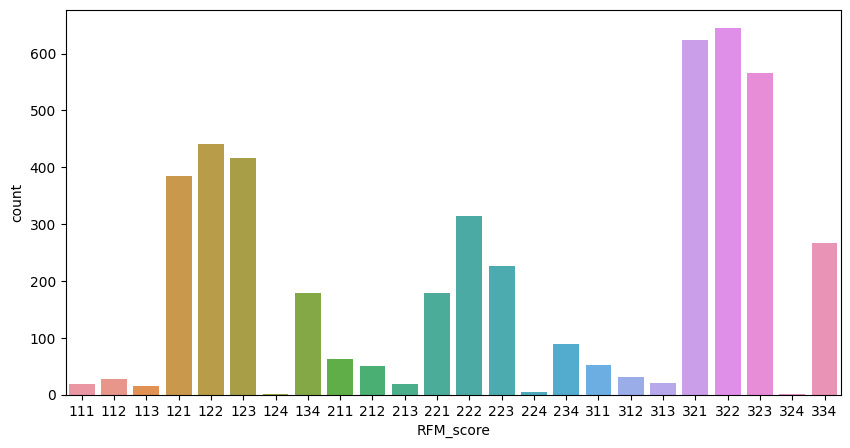

INFO:pycodestyle:3:23: E231 missing whitespace after ','


In [283]:
# построим график распределения значений по RFM-рейтингу

plt.figure(figsize=(10,5))
sns.countplot(data=RFM, x=RFM.RFM_score.sort_values())

Мы получили 24 сегмента. При этом в некоторые сегменты попало мало студентов, так что объединим некоторые сегменты, увеличив количество студентов в них.

Лучше всего с курсами справляются студенты 111, но таких всего 18 человек. Хуже всего - студенты 334 (они не сдали ни одного курса), их 267 человек. Мы не будем учитывать frequency для студентов, которые сдали 1 и 2 курса, но отдельно учтем тех, кто не сдал ни одного.

Выделим следующие сегменты:

111 и 121  - Чемпионы (сдают быстро (относительно других студентов), имеют самый высокий средний балл)

211, 221, 311 и 321 - Крепкие отличники (эти студенты сдают так же хорошо, как и первая группа, но по каким-то причинам тратят больше времени (между ними и группой 1 значительная разница), и стоило бы выяснить почему)

112 и 122 - Потенциальные отличники (в целом не имеют проблем, сдают быстро и хорошо, могли бы перейти в отличники, если оказать дополнительную помощь)

212 и 222, 312 и 322 - Крепкие хорошисты (по каким-то причинам сдают медленнее своих товарищей по среднему баллу)

113 и 123 - Крепкие троешники (сдают относительно быстро, но имеют невысокий средний балл (удовлетворительный))

213, 223, 313 и 323 - В зоне риска (эти студенты едва успевают сдать на удовлетворительный балл; считаю, что таким студентам требуется дополнительная помощь)

124, 224 и 324, 134, 234 и 334 - Двоешники (три первые группы составляют студенты, которые сдали по одному курсу, но имеют низкий средний балл из-за неудачных попыток сдачи; три последние группы составляют студенты, которые не сдали ни одного курса)

In [285]:
# добавим в датафрейм информацию о сегменте, к которому принадлежит каждый студент

segt_map = {
    r'1[1-2]1': 'Чемпионы',
    r'[2-3][1-2]1': 'Крепкие отличники',
    r'1[1-2]2': 'Потенциальные отличники',
    r'[2-3][1-2]2': 'Крепкие хорошисты',
    r'1[1-2]3': 'Крепкие троешники',
    r'[2-3][1-2]3': 'В зоне риска',
    r'[1-3][2-3]4': 'Двоешники'
}

RFM['Segment'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM['Segment'] = RFM['Segment'].replace(segt_map, regex=True)

INFO:pycodestyle:1:80: E501 line too long (82 > 79 characters)


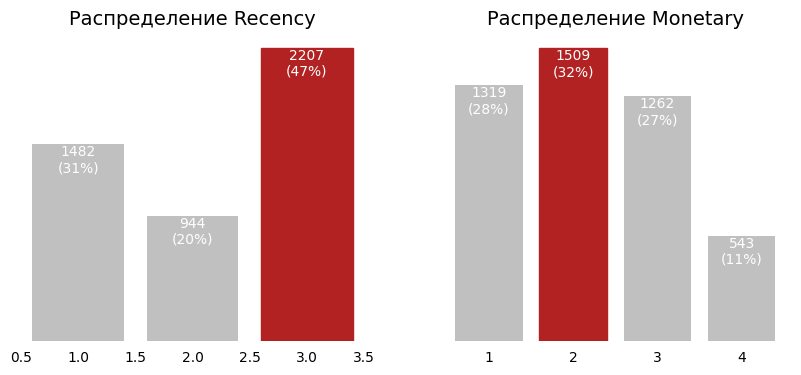

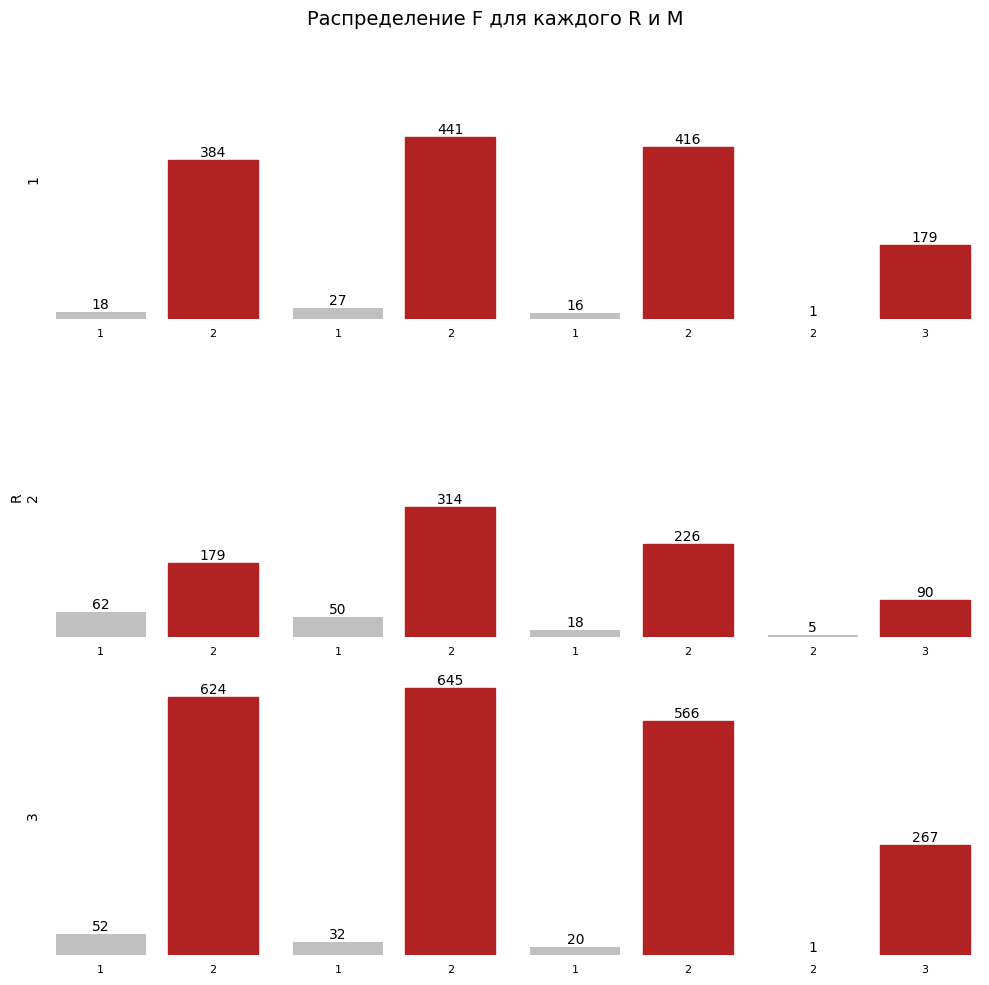

ValueError: ignored

In [286]:
# Построим распределение студентов по R и M

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'M']):
    parameters = {'R':'Recency', 'M':'Monetary'}
    y = RFM[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Распределение {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# Построим распределение M каждого значения R и F

fig, axes = plt.subplots(nrows=3, ncols=4,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 4)
m_range = range(1, 5)
for r in r_range:
    for m in m_range:
        y = RFM[(RFM['R'] == r) & (RFM['M'] == m)]['F'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, m - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if m == 5:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if m == 1:
            if r == 2:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Распределение F для каждого R и M',
             fontsize=14)
plt.tight_layout()
plt.show()

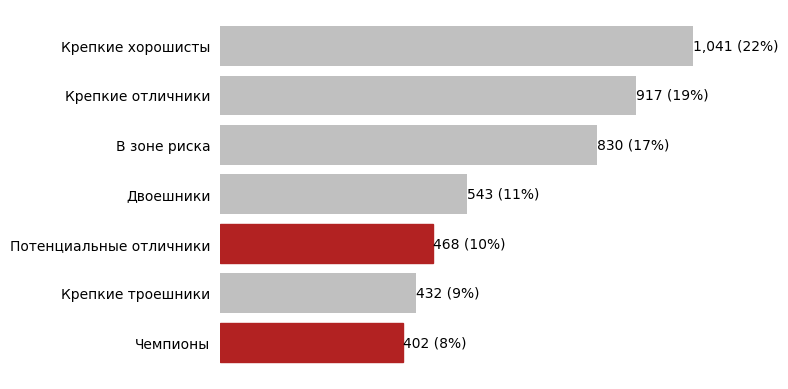

INFO:pycodestyle:8:15: E128 continuation line under-indented for visual indent
INFO:pycodestyle:9:15: E128 continuation line under-indented for visual indent
INFO:pycodestyle:18:9: E117 over-indented
INFO:pycodestyle:24:36: E128 continuation line under-indented for visual indent
INFO:pycodestyle:27:16: E124 closing bracket does not match visual indentation


In [287]:
# посчитаем количество студентов в каждом сегменте

segments_counts = RFM['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Чемпионы', 'Потенциальные отличники']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

###### Ответ на задание 6:

Практически половина студентов тратит больше времени на сдачу экзаменов (относительно других студентов), но нужно иметь в виду, что они все равно успевают сдать экзамен сильно раньше дедлайна (для экзаменов он составляет 247 дней). 

Большинство студентов входят в группу «крепкие»: это студенты, которые на первый взгляд не испытывают особых трудностей (хорошо учатся, быстро сдают). 

Меньше всего, ожидаемо, чемпионов, которые «быстрее» и «умнее» остальных. 

Достаточно большую группу составляют студенты «В зоне риска»: это студенты, которые в среднем тратят больше времени на сдачу экзаменов, а при условии, что они получают в среднем невысокий балл, могут испытывать трудности и начать учиться хуже, так что на них требуется обратить внимание. 

Достаточно много (десятая часть) всех студентов относится к категории «Двоечники»: это студенты, которые либо не сдали ни одного курса, либо сдали один, но имеют низкий средний балл (ниже 40). На эту категорию также следовало бы обратить внимание хотя бы просто потому, что их слишком много и нужно сокращать количество таких студентов.

Требуют внимания и «Потенциальные отличники», поскольку нужно выяснить, чего им не хватает, чтобы начать учиться лучше (повысить свой средний балл).